In [2]:
import pandas as pd

In [8]:
data = pd.read_csv('companies.csv')

In [29]:
data.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [13]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [82]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

In [25]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

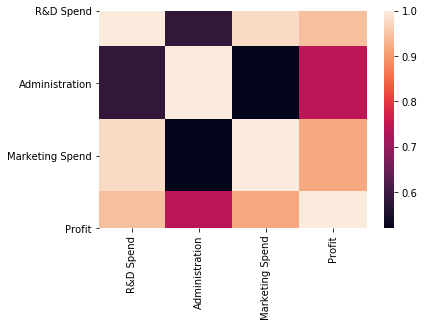

In [28]:
sns.heatmap(data.corr())

In [83]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
l = LabelEncoder()
x[:, 3] = l.fit_transform(x[:, 3])

h = OneHotEncoder(categorical_features=[3])
x = h.fit_transform(x).toarray()

In [84]:
x = x[:, 1:]
x

array([[0.0000000e+00, 1.0000000e+00, 1.6534920e+05, 1.3689780e+05,
        4.7178410e+05],
       [0.0000000e+00, 0.0000000e+00, 1.6259770e+05, 1.5137759e+05,
        4.4389853e+05],
       [1.0000000e+00, 0.0000000e+00, 1.5344151e+05, 1.0114555e+05,
        4.0793454e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.0027547e+05, 2.4192631e+05,
        2.2714282e+05],
       [0.0000000e+00, 0.0000000e+00, 1.2845623e+05, 3.2165214e+05,
        2.8169232e+05],
       [0.0000000e+00, 1.0000000e+00, 1.6118172e+05, 2.7093986e+05,
        2.9544217e+05]])

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

In [66]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [67]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [68]:
y_pred = reg.predict(X_test)

In [73]:
reg.coef_

array([-8.80536598e+02, -6.98169073e+02,  5.25845857e-01,  8.44390881e-01,
        1.07574255e-01])

In [75]:
reg.intercept_

-51035.22972399331

In [74]:
r2_score(y_test, y_pred)

0.9112695892268728